In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2_contingency, ttest_ind, spearmanr
from sklearn.metrics import roc_curve, auc
from google.colab import files

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving Thesis_Ishory_Dai_Modified.csv to Thesis_Ishory_Dai_Modified.csv


In [ ]:
# Use the uploaded file in colab
ruf = pd.read_csv("Thesis_Ishory_Dai_Modified.csv")
ruf.head()

,Distraction_defect_MRU,distraction_defect_RGU,PVD_MRU,RUMD_MRU,PUL_MRU,Gap_index_MRU,Surgical_Steps
0,2.60,2.70,3.40,0.69,2.38,0.94,1
1,1.90,2.16,2.15,0.93,3.11,1.12,1
2,2.24,2.88,1.95,1.40,2.46,0.89,1
3,2.89,4.59,0.90,0.95,2.07,0.90,1
4,4.95,4.60,0.80,1.39,2.79,0.56,2


In [ ]:
# View the details of the dataset to check if data contains null values
ruf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distraction_defect_MRU  20 non-null     float64
 1   distraction_defect_RGU  20 non-null     float64
 2   PVD_MRU                 20 non-null     float64
 3   RUMD_MRU                20 non-null     float64
 4   PUL_MRU                 20 non-null     float64
 5   Gap_index_MRU           20 non-null     float64
 6   Surgical_Steps          20 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


In [ ]:
# View the statistical values
ruf.describe()

,Distraction_defect_MRU,distraction_defect_RGU,PVD_MRU,RUMD_MRU,PUL_MRU,Gap_index_MRU,Surgical_Steps
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2.683000,3.093500,1.520000,0.964000,2.447500,0.942000,1.35000
std,1.130766,1.118125,0.625931,0.341289,0.609062,0.300869,0.48936
min,1.450000,1.670000,0.750000,0.500000,1.480000,0.480000,1.00000
25%,1.837500,2.245000,1.062500,0.712500,2.067500,0.727500,1.00000
50%,2.360000,2.650000,1.500000,0.915000,2.480000,0.970000,1.00000
75%,3.130000,4.125000,1.762500,1.200000,2.627500,1.152500,2.00000
max,4.950000,5.150000,3.400000,1.770000,4.340000,1.500000,2.00000


In [ ]:
# Plot distribution plots with normal distribution curve
columns_to_plot = ruf.columns[:-1]  # Exclude 'Surgical_Steps'

# Calculate correlation matrix
correlation_matrix = ruf.corr()

# Ensure correct column name for 'Surgical_Steps'
surgical_steps_column = [col for col in ruf.columns if 'Surgical_Steps' in col][0]

# Display the correlation of each column with 'Surgical_Steps'
correlation_with_surgical_steps = correlation_matrix[surgical_steps_column].drop(surgical_steps_column)

# Create a DataFrame to display the correlation values
correlation_table = pd.DataFrame(correlation_with_surgical_steps).reset_index()
correlation_table.columns = ['Column', 'Correlation with Surgical_Steps']

# Display the correlation table
print(correlation_table)

                   Column  Correlation with Surgical_Steps
0  Distraction_defect_MRU                         0.576296
1  distraction_defect_RGU                         0.543999
2                 PVD_MRU                        -0.403793
3                RUMD_MRU                        -0.368077
4                 PUL_MRU                         0.149657
5          Gap_index_MRU                         -0.516187


In [ ]:
# Categorize each column based on mean value and perform chi-square test
chi_square_results = []
mean_comparison_results = []

for col in columns_to_plot:
    # Categorize based on mean
    mean_val = ruf[col].mean()
    ruf[f'{col}_cat'] = np.where(ruf[col] > mean_val, 'Above Mean', 'Below Mean')

    # Create contingency table
    contingency_table = pd.crosstab(ruf[f'{col}_cat'], ruf[surgical_steps_column])

    # Perform chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Store the chi-square test results
    chi_square_results.append({
        'Column': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

    # Mean comparison results
    above_mean = ruf[ruf[col] > mean_val]
    below_mean = ruf[ruf[col] <= mean_val]

    above_mean_count = len(above_mean)
    below_mean_count = len(below_mean)

    above_mean_steps = above_mean[surgical_steps_column].value_counts().to_dict()
    below_mean_steps = below_mean[surgical_steps_column].value_counts().to_dict()

    mean_comparison_results.append({
        'Column': col,
        'Mean': mean_val,
        'Above Mean Count': above_mean_count,
        'Below Mean Count': below_mean_count,
        'Above Mean Surgical Steps': above_mean_steps,
        'Below Mean Surgical Steps': below_mean_steps
    })

In [ ]:
# Convert results to DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Display the chi-square test results
print("Chi-Square Test Results:")
print(chi_square_df)

Chi-Square Test Results:
                   Column  Chi2 Statistic   p-value  Degrees of Freedom
0  Distraction_defect_MRU        4.059896  0.043913                   1
1  distraction_defect_RGU        4.059896  0.043913                   1
2                 PVD_MRU        0.082418  0.774048                   1
3                RUMD_MRU        1.547619  0.213487                   1
4                 PUL_MRU        0.000000  1.000000                   1
5          Gap_index_MRU         0.879121  0.348443                   1


In [ ]:
# Restructure the DataFrame for better readability
structured_results = []

for row in mean_comparison_results:
    structured_results.append({
        'Column': row['Column'],
        'Mean': row['Mean'],
        'AM_Count': row['Above Mean Count'],
        'BM_Count': row['Below Mean Count'],
        'AMSS_1': row['Above Mean Surgical Steps'].get(1, 0),
        'AMSS_2': row['Above Mean Surgical Steps'].get(2, 0),
        'BMSS_1': row['Below Mean Surgical Steps'].get(1, 0),
        'BMSS_2': row['Below Mean Surgical Steps'].get(2, 0),
    })

# Convert structured results to DataFrame
structured_df = pd.DataFrame(structured_results)

# Display the restructured mean comparison results
print("Mean Comparison Results:")
print(structured_df.to_string(index=False))

Mean Comparison Results:
                Column   Mean  AM_Count  BM_Count  AMSS_1  AMSS_2  BMSS_1  BMSS_2
Distraction_defect_MRU 2.6830         7        13       2       5      11       2
distraction_defect_RGU 3.0935         7        13       2       5      11       2
               PVD_MRU 1.5200         8        12       6       2       7       5
              RUMD_MRU 0.9640         8        12       7       1       6       6
               PUL_MRU 2.4475        11         9       7       4       6       3
        Gap_index_MRU  0.9420        10        10       8       2       5       5


In [ ]:
# Strip extra spaces from column names in structured_df
structured_df.columns = structured_df.columns.str.strip()

In [ ]:
# Verify the columns again
print("Columns in structured_df after cleaning:")
print(structured_df['Column'].unique())

Columns in structured_df after cleaning:
['Distraction_defect_MRU' 'distraction_defect_RGU' 'PVD_MRU' 'RUMD_MRU'
 'PUL_MRU' 'Gap_index_MRU ']


In [ ]:
# Define the confusion matrix mapping
confusion_matrix_mapping = {
    'Distraction_defect_MRU': {'TP': 'AMSS_2', 'FP': 'AMSS_1', 'TN': 'BMSS_1', 'FN': 'BMSS_2'},
    'distraction_defect_RGU': {'TP': 'AMSS_2', 'FP': 'AMSS_1', 'TN': 'BMSS_1', 'FN': 'BMSS_2'},
    'PVD_MRU': {'TP': 'BMSS_2', 'FP': 'BMSS_1', 'TN': 'AMSS_1', 'FN': 'AMSS_2'},
    'RUMD_MRU': {'TP': 'BMSS_1', 'FP': 'AMSS_2', 'TN': 'AMSS_1', 'FN': 'BMSS_2'},
    'PUL_MRU': {'TP': 'AMSS_2', 'FP': 'BMSS_2', 'TN': 'BMSS_1', 'FN': 'AMSS_1'},
    'Gap_index_MRU ': {'TP': 'AMSS_1', 'FP': 'AMSS_2', 'TN': 'BMSS_2', 'FN': 'BMSS_1'},
}

# Construct the confusion matrix
confusion_matrix = {}
for column, mapping in confusion_matrix_mapping.items():
    if column in structured_df['Column'].values:
        confusion_matrix[column] = {key: structured_df.loc[structured_df['Column'] == column, value].values[0]
                                    for key, value in mapping.items()}

In [ ]:
# Check the confusion matrix for completeness
print("Confusion Matrix:")
for column, values in confusion_matrix.items():
    print(f"{column}: {values}")

Confusion Matrix:
Distraction_defect_MRU: {'TP': 5, 'FP': 2, 'TN': 11, 'FN': 2}
distraction_defect_RGU: {'TP': 5, 'FP': 2, 'TN': 11, 'FN': 2}
PVD_MRU: {'TP': 5, 'FP': 7, 'TN': 6, 'FN': 2}
RUMD_MRU: {'TP': 6, 'FP': 1, 'TN': 7, 'FN': 6}
PUL_MRU: {'TP': 4, 'FP': 3, 'TN': 6, 'FN': 7}
Gap_index_MRU : {'TP': 8, 'FP': 2, 'TN': 5, 'FN': 5}


In [ ]:
# Calculate ROC curve and sensitivity
roc_results = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i, (column, values) in enumerate(confusion_matrix.items()):
    TP, FP, TN, FN = values['TP'], values['FP'], values['TN'], values['FN']

    # Sensitivity (True Positive Rate)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity (True Negative Rate)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Compute Youden Index
    youden_index = sensitivity + specificity - 1

    # Create ROC curve points
    roc_x = [0, 1 - specificity, 1]
    roc_y = [0, sensitivity, 1]

    # Calculate AUC
    roc_auc = auc(roc_x, roc_y)

    roc_results.append({
        'Column': column,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Youden Index': youden_index,
        'AUC': roc_auc
    })

# Convert ROC results to DataFrame
roc_df = pd.DataFrame(roc_results)

# Display the ROC results
print("ROC Results:")
print(roc_df.to_string(index=False))

ROC Results:
                Column  TP  FP  TN  FN  Sensitivity  Specificity  Youden Index      AUC
Distraction_defect_MRU   5   2  11   2     0.714286     0.846154      0.560440 0.780220
distraction_defect_RGU   5   2  11   2     0.714286     0.846154      0.560440 0.780220
               PVD_MRU   5   7   6   2     0.714286     0.461538      0.175824 0.587912
              RUMD_MRU   6   1   7   6     0.500000     0.875000      0.375000 0.687500
               PUL_MRU   4   3   6   7     0.363636     0.666667      0.030303 0.515152
        Gap_index_MRU    8   2   5   5     0.615385     0.714286      0.329670 0.664835


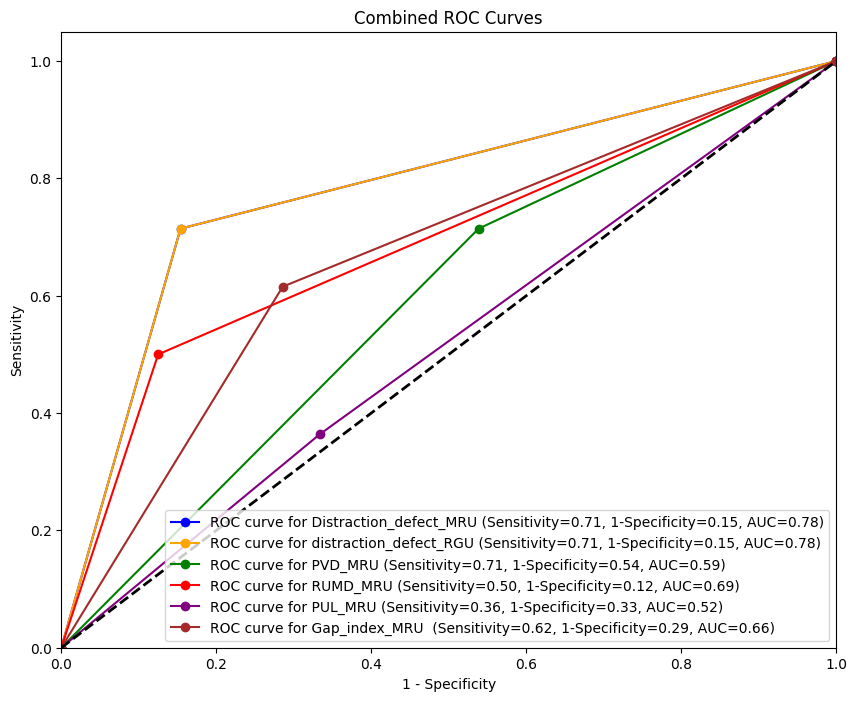

In [ ]:
# Define colors for plotting
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot Combined ROC Curves
plt.figure(figsize=(10, 8))

for i, row in enumerate(roc_results):
    column = row['Column']
    roc_x = [0, 1 - row['Specificity'], 1]
    roc_y = [0, row['Sensitivity'], 1]
    plt.plot(roc_x, roc_y, color=colors[i % len(colors)], marker='o',
             label=f'ROC curve for {column} (Sensitivity={row["Sensitivity"]:.2f}, 1-Specificity={1 - row["Specificity"]:.2f}, AUC={row["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Combined ROC Curves')
plt.legend(loc="lower right")
plt.show()

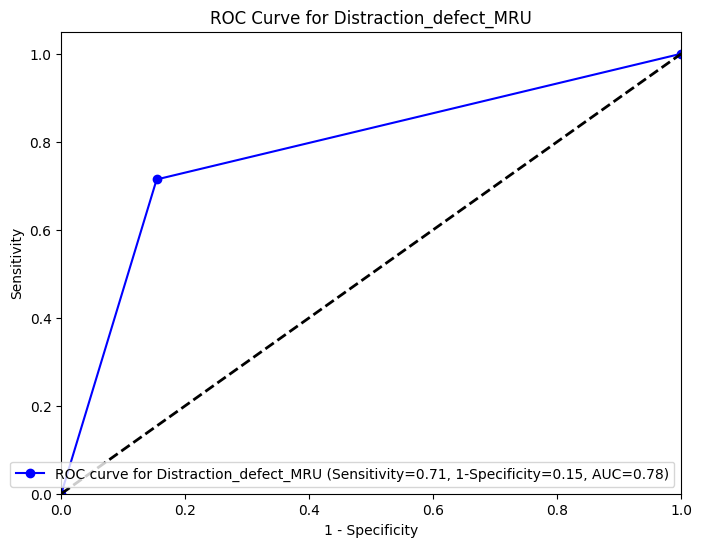

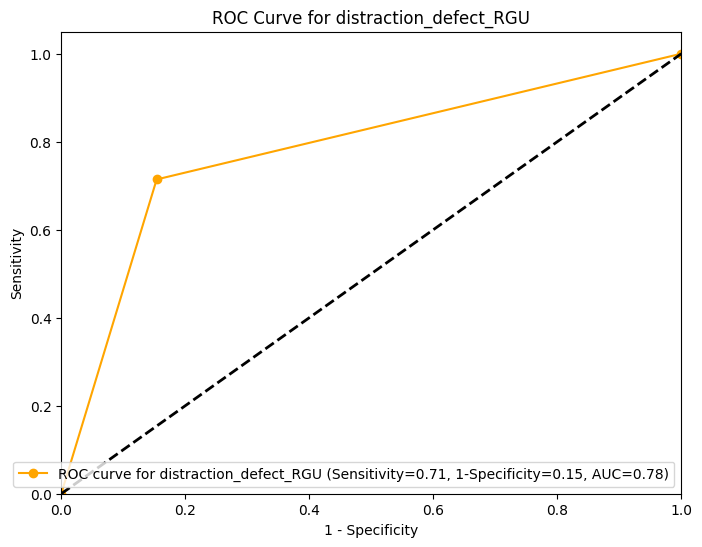

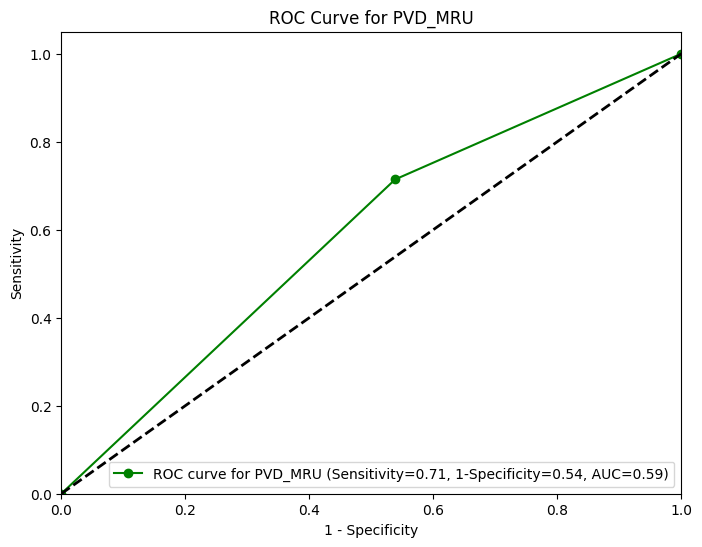

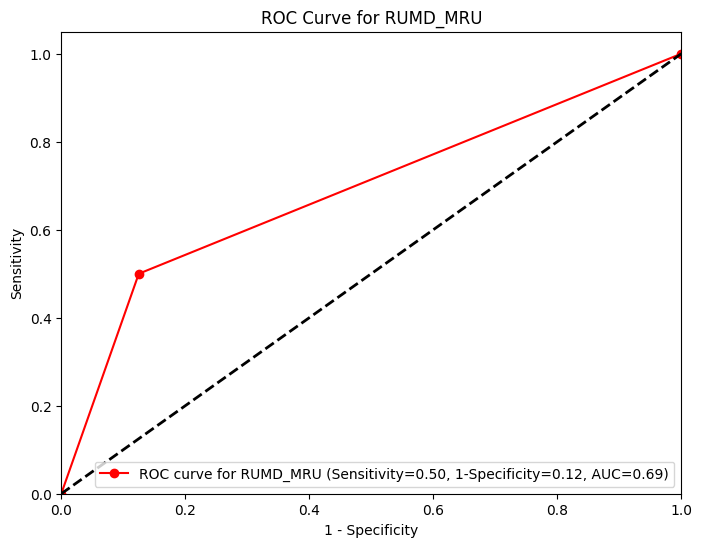

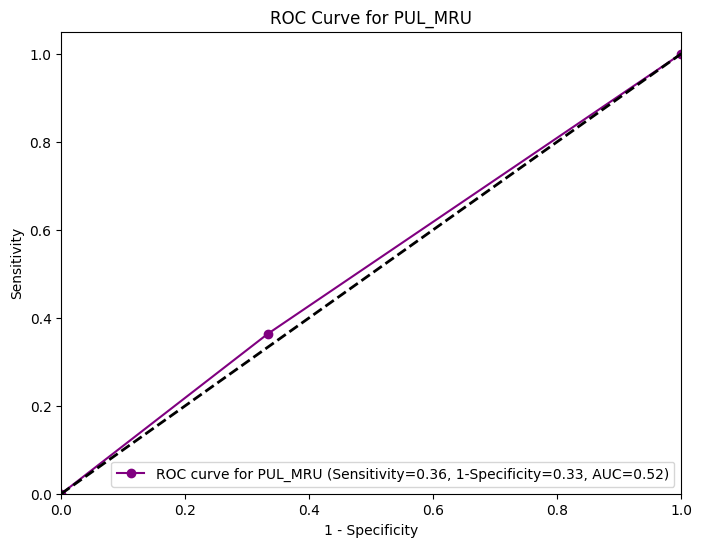

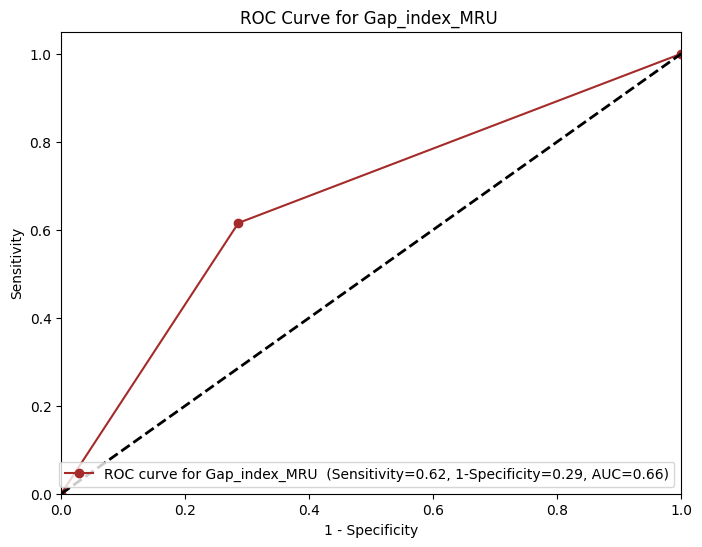

In [ ]:
# Plot Separate ROC Curves
for i, row in enumerate(roc_results):
    column = row['Column']
    roc_x = [0, 1 - row['Specificity'], 1]
    roc_y = [0, row['Sensitivity'], 1]

    plt.figure(figsize=(8, 6))
    plt.plot(roc_x, roc_y, color=colors[i % len(colors)], marker='o',
             label=f'ROC curve for {column} (Sensitivity={row["Sensitivity"]:.2f}, 1-Specificity={1 - row["Specificity"]:.2f}, AUC={row["AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(f'ROC Curve for {column}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Import the necessary library for the Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each column against the 'Surgical_Steps' column
mann_whitney_results = []

for col in columns_to_plot:
    group1 = ruf[ruf[surgical_steps_column] == 1][col]
    group2 = ruf[ruf[surgical_steps_column] == 2][col]

    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(group1, group2)

    # Store the results
    mann_whitney_results.append({
        'Column': col,
        'U Statistic': stat,
        'p-value': p_value
    })

# Convert results to DataFrame
mann_whitney_df = pd.DataFrame(mann_whitney_results)

# Display the Mann-Whitney U test results
print("Mann-Whitney U Test Results:")
print(mann_whitney_df.to_string(index=False))

Mann-Whitney U Test Results:
                Column  U Statistic  p-value
Distraction_defect_MRU         19.0 0.036945
distraction_defect_RGU         18.0 0.029696
               PVD_MRU         67.0 0.095467
              RUMD_MRU         68.0 0.081045
               PUL_MRU         41.5 0.781110
        Gap_index_MRU          70.0 0.055676


In [ ]:
# Import additional libraries
from scipy.stats import ttest_ind, spearmanr
from sklearn.metrics import roc_curve, roc_auc_score

# Two-sample t-test
ttest_results = []
for col in columns_to_plot:
    group0 = ruf[ruf[surgical_steps_column] == 1][col]
    group1 = ruf[ruf[surgical_steps_column] == 2][col]

    # Perform the t-test
    t_stat, p_value = ttest_ind(group0, group1, equal_var=True)

    ttest_results.append({
        'Column': col,
        'T-Statistic': t_stat,
        'p-value': p_value
    })

# Convert t-test results to DataFrame
ttest_df = pd.DataFrame(ttest_results)

# Display the t-test results
print("T-Test Results:")
print(ttest_df.to_string(index=False))

T-Test Results:
                Column  T-Statistic  p-value
Distraction_defect_MRU    -2.991794 0.007824
distraction_defect_RGU    -2.750605 0.013155
               PVD_MRU     1.872601 0.077460
              RUMD_MRU     1.679529 0.110322
               PUL_MRU    -0.642171 0.528857
        Gap_index_MRU      2.556987 0.019808


In [ ]:
# Spearman's Rank Correlation
spearman_results = []

for col in columns_to_plot:
    rho, p_value = spearmanr(ruf[col], ruf[surgical_steps_column])
    spearman_results.append({
        'Column': col,
        'Spearman rho': rho,
        'p-value': p_value
    })

# Convert Spearman results to DataFrame
spearman_df = pd.DataFrame(spearman_results)

# Display the Spearman results
print("Spearman's Rank Correlation Results:")
print(spearman_df.to_string(index=False))

Spearman's Rank Correlation Results:
                Column  Spearman rho  p-value
Distraction_defect_MRU      0.481758 0.031486
distraction_defect_RGU      0.499938 0.024790
               PVD_MRU     -0.391597 0.087732
              RUMD_MRU     -0.409348 0.073090
               PUL_MRU      0.072855 0.760179
        Gap_index_MRU      -0.445399 0.049062


In [ ]:
# Optimal Cutpoint Estimation using Youden Index
cutpoint_results = []

for col in columns_to_plot:
    y_true = ruf[surgical_steps_column]
    y_scores = ruf[col]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=2)
    roc_auc = roc_auc_score(y_true, y_scores)

    # Compute Youden Index
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    sensitivity = tpr[optimal_idx]
    specificity = 1 - fpr[optimal_idx]

    cutpoint_results.append({
        'Column': col,
        'Optimal Cutpoint': optimal_threshold,
        'Youden Index': youden_index[optimal_idx],
        'Sensitivity at Cutpoint': sensitivity,
        'Specificity at Cutpoint': specificity,
        'AUC': roc_auc
    })

# Convert cutpoint results to DataFrame
cutpoint_df = pd.DataFrame(cutpoint_results)

# Display the cutpoint results
print("Optimal Cutpoint Estimation Results:")
print(cutpoint_df.to_string(index=False))

Optimal Cutpoint Estimation Results:
                Column  Optimal Cutpoint  Youden Index  Sensitivity at Cutpoint  Specificity at Cutpoint      AUC
Distraction_defect_MRU              4.00      0.571429                 0.571429                 1.000000 0.791209
distraction_defect_RGU              3.50      0.560440                 0.714286                 0.846154 0.802198
               PVD_MRU               inf      0.000000                 0.000000                 1.000000 0.263736
              RUMD_MRU               inf      0.000000                 0.000000                 1.000000 0.252747
               PUL_MRU              2.40      0.175824                 0.714286                 0.461538 0.543956
        Gap_index_MRU               1.16      0.054945                 0.285714                 0.769231 0.230769


In [ ]:
# to fix inf values
cutpoint_results = []

for col in columns_to_plot:
    y_true = ruf[surgical_steps_column]
    y_scores = ruf[col]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=2)

    # Filter out inf values from thresholds
    valid_indices = np.isfinite(thresholds)  # Boolean array indicating valid thresholds
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]
    thresholds_valid = thresholds[valid_indices]

    # If no valid thresholds, handle gracefully
    if len(thresholds_valid) == 0:
        cutpoint_results.append({
            'Column': col,
            'Optimal Cutpoint': np.nan,
            'Youden Index': np.nan,
            'Sensitivity at Cutpoint': np.nan,
            'Specificity at Cutpoint': np.nan,
            'AUC': np.nan
        })
        continue

    # Compute Youden Index
    youden_index = tpr_valid - fpr_valid
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds_valid[optimal_idx]
    sensitivity = tpr_valid[optimal_idx]
    specificity = 1 - fpr_valid[optimal_idx]
    roc_auc = roc_auc_score(y_true, y_scores)

    cutpoint_results.append({
        'Column': col,
        'Optimal Cutpoint': optimal_threshold,
        'Youden Index': youden_index[optimal_idx],
        'Sensitivity at Cutpoint': sensitivity,
        'Specificity at Cutpoint': specificity,
        'AUC': roc_auc
    })

# Convert cutpoint results to DataFrame
cutpoint_df = pd.DataFrame(cutpoint_results)

# Display the cutpoint results
print("Optimal Cutpoint Estimation Results:")
print(cutpoint_df.to_string(index=False))

Optimal Cutpoint Estimation Results:
                Column  Optimal Cutpoint  Youden Index  Sensitivity at Cutpoint  Specificity at Cutpoint      AUC
Distraction_defect_MRU              4.00      0.571429                 0.571429                 1.000000 0.791209
distraction_defect_RGU              3.50      0.560440                 0.714286                 0.846154 0.802198
               PVD_MRU              0.75      0.000000                 1.000000                 0.000000 0.263736
              RUMD_MRU              0.50      0.000000                 1.000000                 0.000000 0.252747
               PUL_MRU              2.40      0.175824                 0.714286                 0.461538 0.543956
        Gap_index_MRU               1.16      0.054945                 0.285714                 0.769231 0.230769
